# 在线性回归模型中使用梯度下降法

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(666)  # 设置随机数种子
x = 2 * np.random.random(size = 100)
y = x * 3. + 4. + np.random.normal(size = 100)

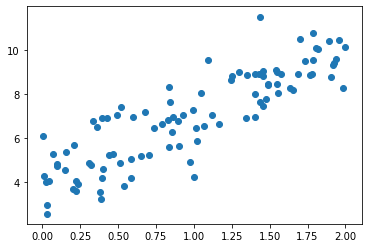

In [3]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)
plt.scatter(X, y)
plt.show()

In [4]:
def J(theta, x_b, y):
    return np.sum((y - x_b.dot(theta)) ** 2) / len(x_b)

def delta_J(theta, x_b, y):
    temp = x_b.dot(theta) - y
    return x_b.T.dot(temp) * 2 / len(temp)

In [5]:
X = np.hstack([np.ones(shape=(len(X),1)), X])

In [6]:
theta_init = [0., 0.]
theta = np.array(theta_init).reshape(-1, 1)
learn_ratio = 0.05
itera_times = 900

loss_his = []
theta_his = np.array(theta_init).reshape(1, -1)

while itera_times:
    delta = delta_J(theta, X, Y)
    theta -= learn_ratio * delta
    loss = J(theta, X, Y)
    theta_his = np.concatenate([theta_his, theta.reshape(1,-1)])
    loss_his.append(loss)
    
    itera_times -= 1

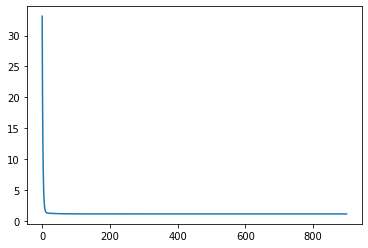

1.0988695676788418

In [7]:
plt.plot(loss_his)
plt.show()
np.min(loss_his) 

In [8]:
theta_his

array([[0.        , 0.        ],
       [0.69810784, 0.79768393],
       [1.2479051 , 1.4200378 ],
       ...,
       [4.02369649, 3.00517462],
       [4.0236965 , 3.00517462],
       [4.0236965 , 3.00517462]])

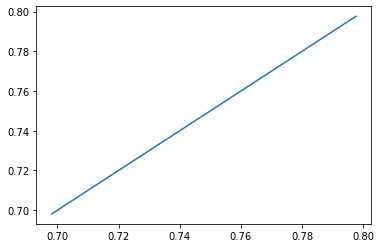

In [9]:
plt.plot(theta_his[1], theta_his[1])
plt.show()

In [10]:
reguler_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
reguler_theta

array([[4.02369667],
       [3.00517447]])

In [11]:
score = J(reguler_theta, X, Y) / np.min(loss_his) 

In [12]:
score

0.9999999999999921

In [13]:
a = np.linspace(1,9,9).reshape(9,-1)
a.shape

(9, 1)

In [14]:
b = a.reshape(1,-1)

In [15]:
c = a.dot(b)
c

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 4.,  8., 12., 16., 20., 24., 28., 32., 36.],
       [ 5., 10., 15., 20., 25., 30., 35., 40., 45.],
       [ 6., 12., 18., 24., 30., 36., 42., 48., 54.],
       [ 7., 14., 21., 28., 35., 42., 49., 56., 63.],
       [ 8., 16., 24., 32., 40., 48., 56., 64., 72.],
       [ 9., 18., 27., 36., 45., 54., 63., 72., 81.]])